In [8]:
# Identificación de Anomalias en una serie temporal
# metododología de Hampel (1974)

## Librerias
suppressWarnings(library(xts))
library(pracma)

In [2]:
## Datos de ingresos
# Nombre archivo serie historica
nombreArchivo <- 'Laikakota-2020030101-2020030123.csv'
# ancho ventana mobil
w <- 60
# diferencia de la deviación estandard
x <- 3

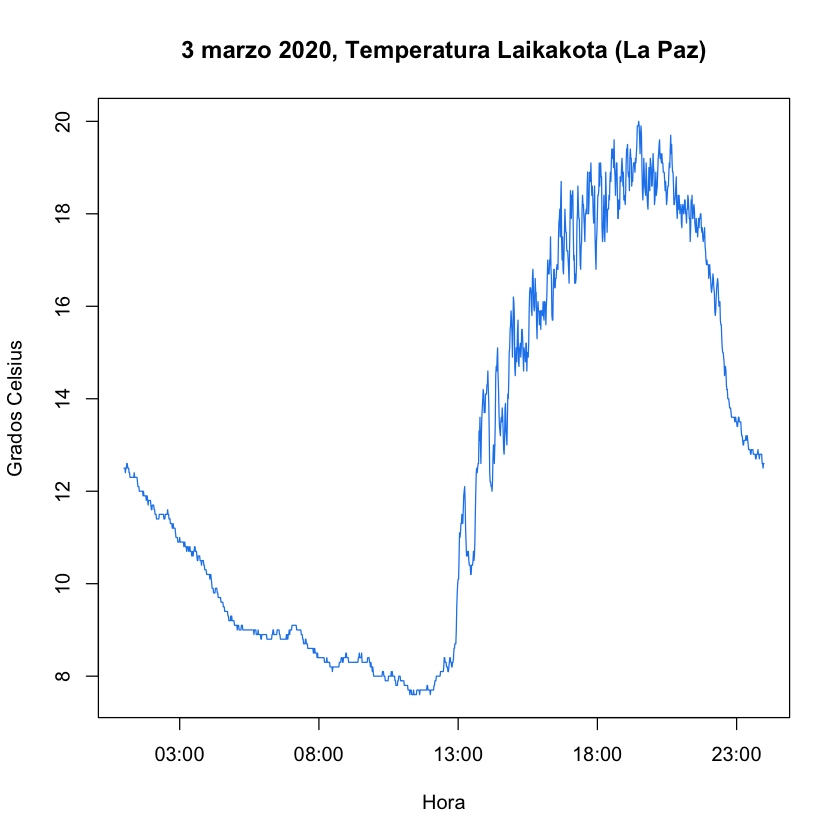

In [4]:
# Cargar la serie historica
datos <- read.table(nombreArchivo,sep=";",header=TRUE)

# Convertir la fecha
fecha <- as.POSIXct(datos$Data, format="%d/%m/%y %H:%M")

# Visualizar la serie original
plot(fecha,datos$Thermometer,'l', col="dodgerblue2",main = "3 marzo 2020, Temperatura Laikakota (La Paz)", xlab = "Hora", ylab = "Grados Celsius")

In [5]:
# Añadir errores
datos_con_anomalias <- datos
datos_con_anomalias[113,2] <- -2
datos_con_anomalias[500,2] <- 25
datos_con_anomalias[800,2] <- 0

In [6]:
# Encontrar los valores anomalos
datos.hampel <- hampel(datos_con_anomalias[,2], w, x)

datos.hampel.anomalias.fecha <- vector()
datos.hampel.anomalias.valor <- vector()

i <- 1
for (ind in datos.hampel$ind) {
  datos.hampel.anomalias.fecha[i] <- fecha[ind]
  datos.hampel.anomalias.valor[i] <- datos_con_anomalias[ind,2]
  i <- i + 1
}

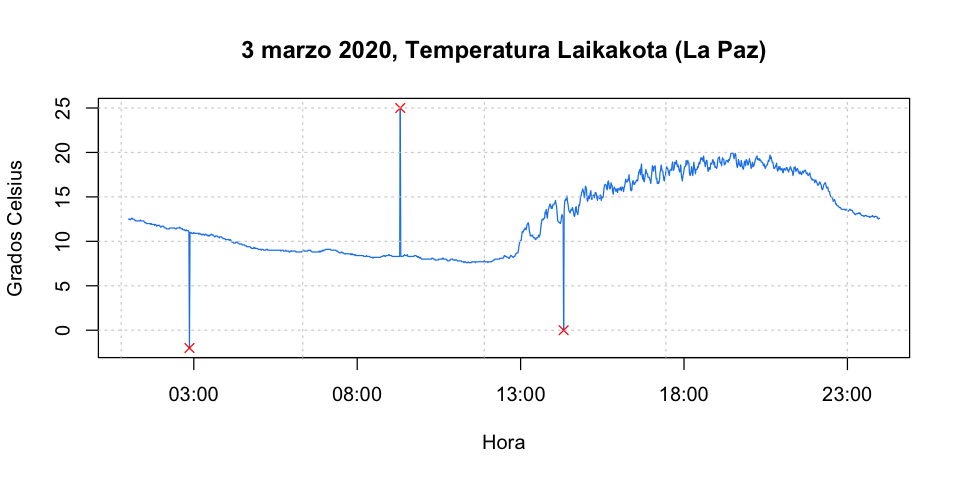

In [7]:
# Visualizar las anomalias
options(repr.plot.width=8, repr.plot.height=4)
plot(fecha,datos_con_anomalias$Thermometer,'l', col="dodgerblue2",main = "3 marzo 2020, Temperatura Laikakota (La Paz)", xlab = "Hora", ylab = "Grados Celsius")
points(datos.hampel.anomalias.fecha, datos.hampel.anomalias.valor,
       pch=4, col="red")
grid()